In [1]:
import pandas as pd
import json
import glob

# Find your saved JSON files (from Day 2)
files = glob.glob('../data/*.json')
if not files:
    raise FileNotFoundError('No JSON files found in ../data/. Run fetch_data.py first.')

print('Found files:', files)

# Load the latest file
with open(files[-1]) as f:
    data = json.load(f)

print('Loaded file:', files[-1])


Found files: ['../data\\BTC_USDT_20251010_123638.json']
Loaded file: ../data\BTC_USDT_20251010_123638.json


In [2]:
list(data.keys())


['timestamp', 'pair', 'ticker', 'orderbook', 'recent_trades']

In [3]:
ticker = data['ticker']

df = pd.DataFrame([{
    'timestamp': pd.to_datetime(data['timestamp']),
    'bid': ticker['bid'],
    'ask': ticker['ask'],
    'last': ticker['last']
}])
df


,timestamp,bid,ask,last
0,2025-10-10 12:36:38.557385,121550.59,121550.6,121550.6


In [4]:
df['mid'] = (df['bid'] + df['ask']) / 2
df['spread'] = df['ask'] - df['bid']
df['rel_spread_%'] = (df['spread'] / df['mid']) * 100
df


,timestamp,bid,ask,last,mid,spread,rel_spread_%
0,2025-10-10 12:36:38.557385,121550.59,121550.6,121550.6,121550.595,0.01,0.000008


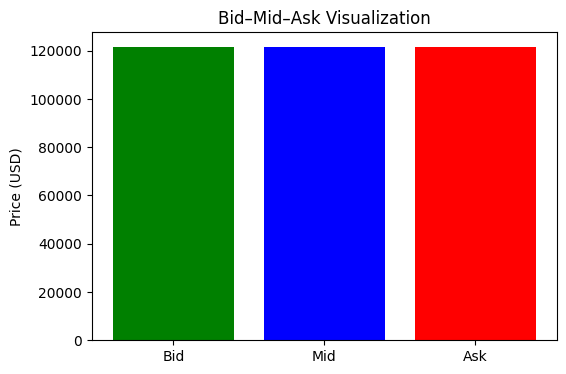

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(['Bid', 'Mid', 'Ask'], [df['bid'][0], df['mid'][0], df['ask'][0]], color=['green', 'blue', 'red'])
plt.title('Bid–Mid–Ask Visualization')
plt.ylabel('Price (USD)')
plt.show()


In [6]:
output_path = '../data/ticker_analysis.csv'
df.to_csv(output_path, index=False)
print(f'Saved processed data to {output_path}')


Saved processed data to ../data/ticker_analysis.csv


### 🧠 Reflection / Notes
- Loaded live JSON from Day 2 and converted it to a structured DataFrame.  
- Computed mid-price, spread, and relative spread.  
- Visualized bid-mid-ask relationship for clarity.  
- Saved processed data for future use (backtesting / visualization).  
- Next: Work with timestamps and alignment between multiple exchanges (Day 4).
